In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('covid-19.csv',parse_dates=['Date'])
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [4]:
# adding new column
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [7]:
df1=df.copy()

In [8]:
df1 = df1.groupby('Date')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()
df1

,Date,Confirmed,Active,Deaths,Recovered
0,2020-01-22,555,510,17,28
1,2020-01-23,654,606,18,30
2,2020-01-24,941,879,26,36
3,2020-01-25,1434,1353,42,39
4,2020-01-26,2118,2010,56,52
...,...,...,...,...,...
121,2020-05-22,5210817,2816014,338160,2056643
122,2020-05-23,5310362,2856080,342097,2112185
123,2020-05-24,5407613,2893991,345059,2168563
124,2020-05-25,5495061,2917091,346232,2231738


In [9]:
df1['month']=pd.DatetimeIndex(df1['Date']).month
df1

,Date,Confirmed,Active,Deaths,Recovered,month
0,2020-01-22,555,510,17,28,1
1,2020-01-23,654,606,18,30,1
2,2020-01-24,941,879,26,36,1
3,2020-01-25,1434,1353,42,39,1
4,2020-01-26,2118,2010,56,52,1
...,...,...,...,...,...,...
121,2020-05-22,5210817,2816014,338160,2056643,5
122,2020-05-23,5310362,2856080,342097,2112185,5
123,2020-05-24,5407613,2893991,345059,2168563,5
124,2020-05-25,5495061,2917091,346232,2231738,5


In [ ]:
df1 = df1.groupby('Date')['Confirmed','Active','Deaths','Recovered','month'].sum().reset_index()

In [10]:
df1.drop('Date',axis=1,inplace=True)
df1

,Confirmed,Active,Deaths,Recovered,month
0,555,510,17,28,1
1,654,606,18,30,1
2,941,879,26,36,1
3,1434,1353,42,39,1
4,2118,2010,56,52,1
...,...,...,...,...,...
121,5210817,2816014,338160,2056643,5
122,5310362,2856080,342097,2112185,5
123,5407613,2893991,345059,2168563,5
124,5495061,2917091,346232,2231738,5


In [11]:
df1.describe()

,Confirmed,Active,Deaths,Recovered,month
count,1.260000e+02,1.260000e+02,126.000000,1.260000e+02,126.000000
mean,1.498241e+06,9.137986e+05,99063.785714,4.853787e+05,3.261905
std,1.766651e+06,1.017518e+06,120650.743916,6.438442e+05,1.246939
min,5.550000e+02,5.100000e+02,17.000000,2.800000e+01,1.000000
25%,7.866850e+04,4.565900e+04,2460.750000,2.301300e+04,2.000000
50%,4.430560e+05,3.117595e+05,20403.000000,1.108935e+05,3.000000
75%,2.859788e+06,1.844698e+06,204639.500000,8.104500e+05,4.000000
max,5.589626e+06,2.952217e+06,350453.000000,2.286956e+06,5.000000


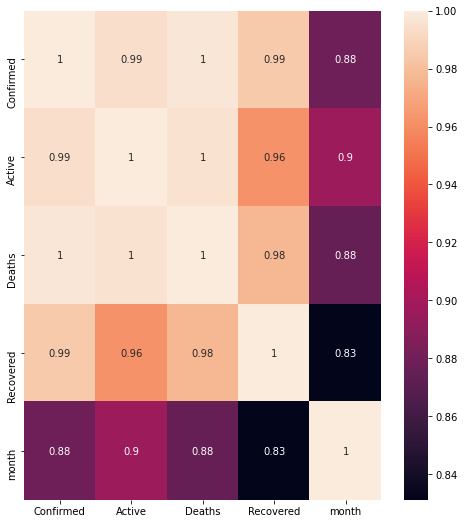

In [12]:
# heatmap correlation

import seaborn as sns
corr_hmap=df1.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Confirmed       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Active       AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Deaths       AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Recovered          AxesSubplot(0.125,0.125;0.227941x0.343182)
month           AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

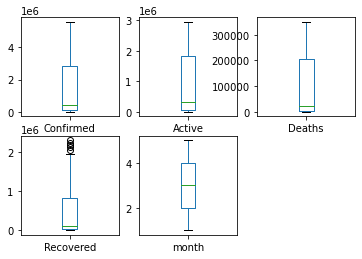

In [13]:
# checking Outliers
df1.plot.box(subplots=True,layout=(2,3))

In [15]:
# removing outliers
from scipy.stats import zscore

z=np.abs(zscore(df1))
df1=df1.loc[(z<3).all(axis=1)]


In [16]:
df1.skew()

Confirmed    0.900444
Active       0.679116
Deaths       0.832783
Recovered    1.311818
month       -0.108898
dtype: float64

In [18]:
# normalizing the clumns by treating skewness

df1['Confirmed']=np.log1p(df1['Confirmed'])
df1['Active']=np.log1p(df1['Active'])
df1['Deaths']=np.log1p(df1['Deaths'])
df1['Recovered']=np.log1p(df1['Recovered'])

In [19]:
#Analyzing the data graphically

In [20]:
#countries having most no. of confirmed,active,death cases
top = df[df['Date'] == df['Date'].max()]
world = top.groupby('Country')['Confirmed','Active','Deaths'].sum().reset_index()
world.head()

,Country,Confirmed,Active,Deaths
0,Afghanistan,11831,10483,220
1,Albania,1029,193,33
2,Algeria,8697,3162,617
3,Andorra,763,36,51
4,Angola,70,48,4


[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

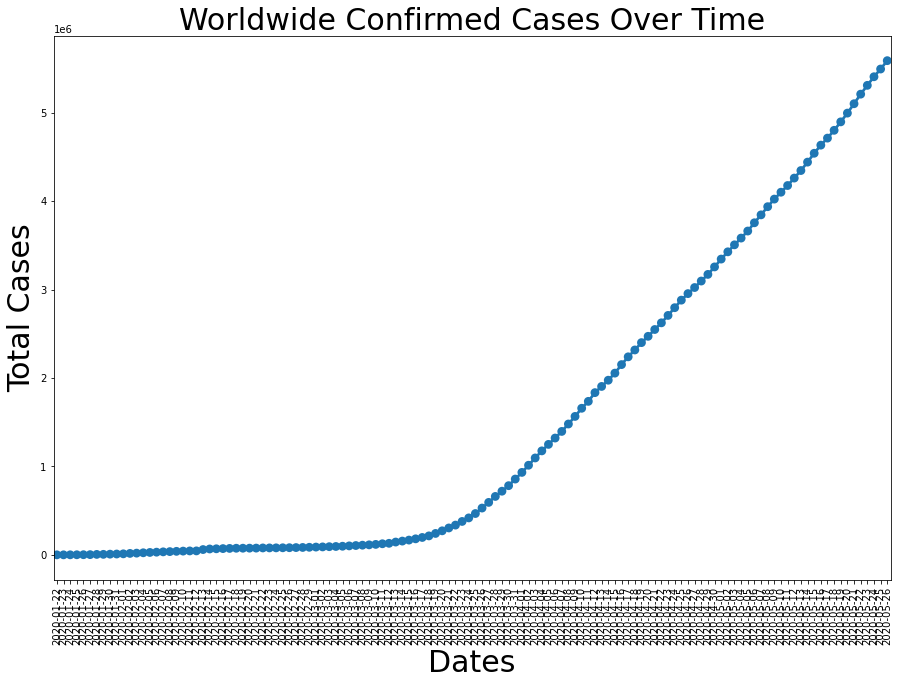

In [21]:
#CONFIRMED CASES
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])

a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Confirmed)
a.set(xlabel="Dates",ylabel="Total Cases")

In [22]:
total_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
121,2020-05-22,5210817
122,2020-05-23,5310362
123,2020-05-24,5407613
124,2020-05-25,5495061


[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

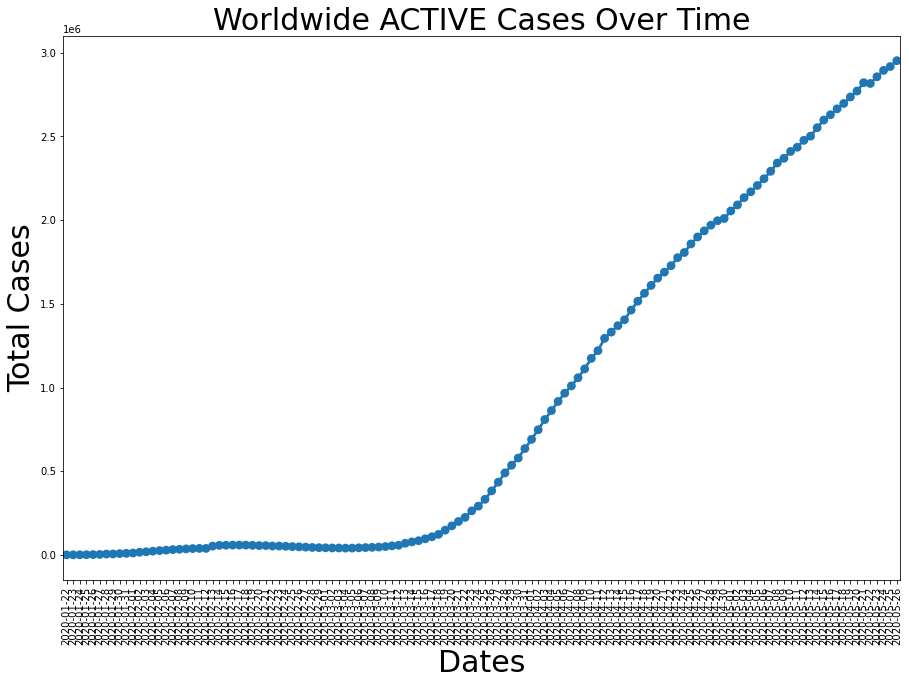

In [23]:
#ACTIVE CASES
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide ACTIVE Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','Active'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Active)
a.set(xlabel="Dates",ylabel="Total Cases")

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

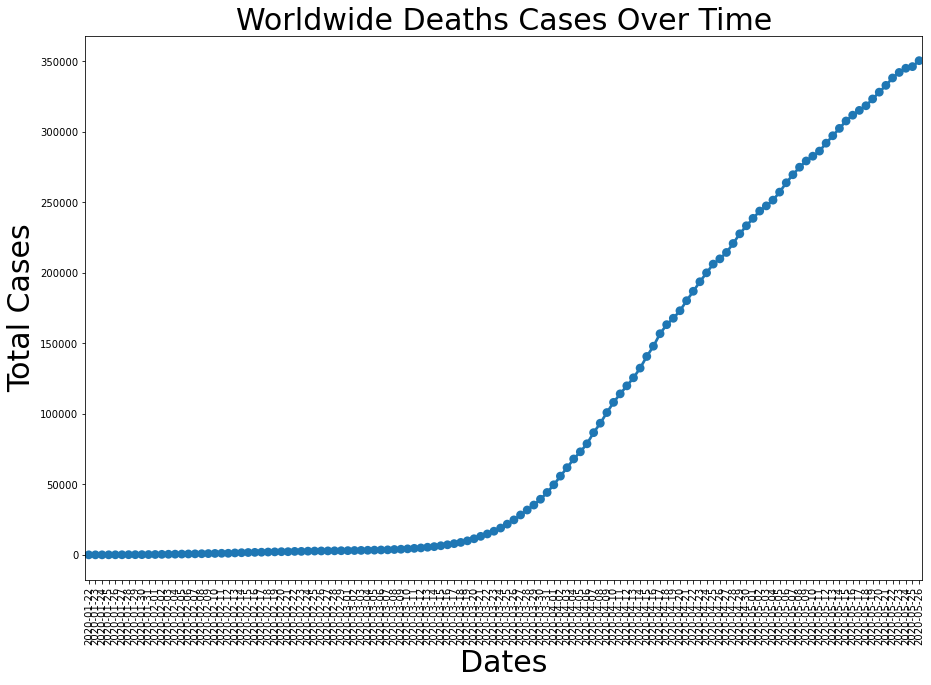

In [24]:
#DEATH CASES
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Deaths Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','Deaths'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Deaths,)
a.set(xlabel="Dates",ylabel="Total Cases")

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

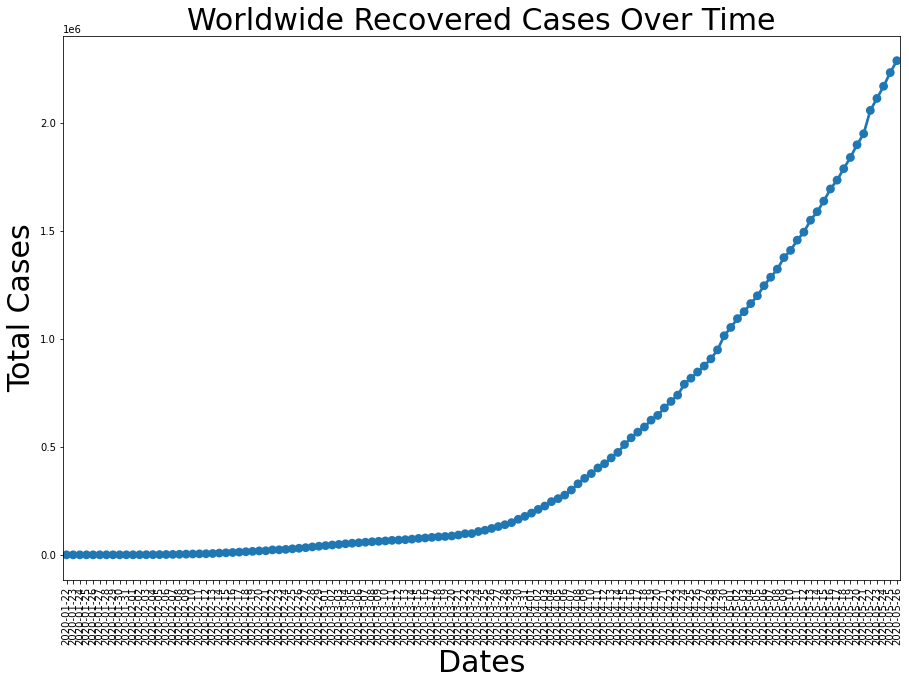

In [25]:
#RECOVERED CASES
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Recovered Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','Recovered'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Recovered)
a.set(xlabel="Dates",ylabel="Total Cases")

In [26]:
#CONFIRMED
top_confirm = top.groupby(by='Country')['Confirmed'].sum()
top_confirm

Country
Afghanistan           11831
Albania                1029
Algeria                8697
Andorra                 763
Angola                   70
                      ...  
West Bank and Gaza      429
Western Sahara            9
Yemen                   249
Zambia                  920
Zimbabwe                 56
Name: Confirmed, Length: 188, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

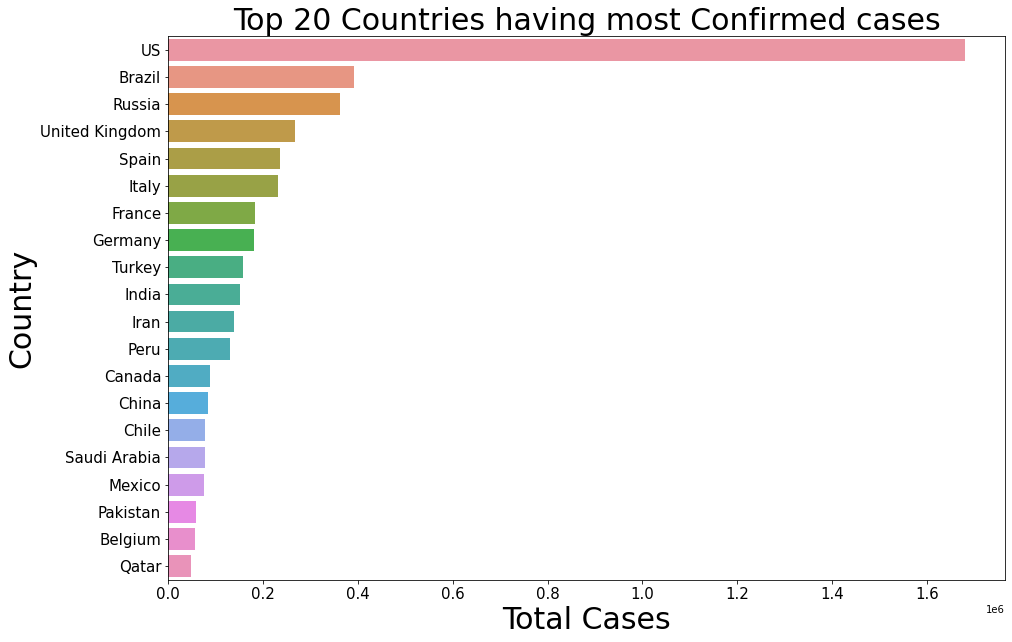

In [27]:
top_confirm= top.groupby(by='Country')['Confirmed'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Confirmed cases",fontsize=30)
ax = sns.barplot(x=top_confirm.Confirmed,y=top_confirm.Country)
ax.set(xlabel="Total Cases",ylabel="Country")

In [28]:
#ACTIVE
top_actives = top.groupby(by='Country')['Active'].sum()
top_actives.head()

Country
Afghanistan    10483
Albania          193
Algeria         3162
Andorra           36
Angola            48
Name: Active, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

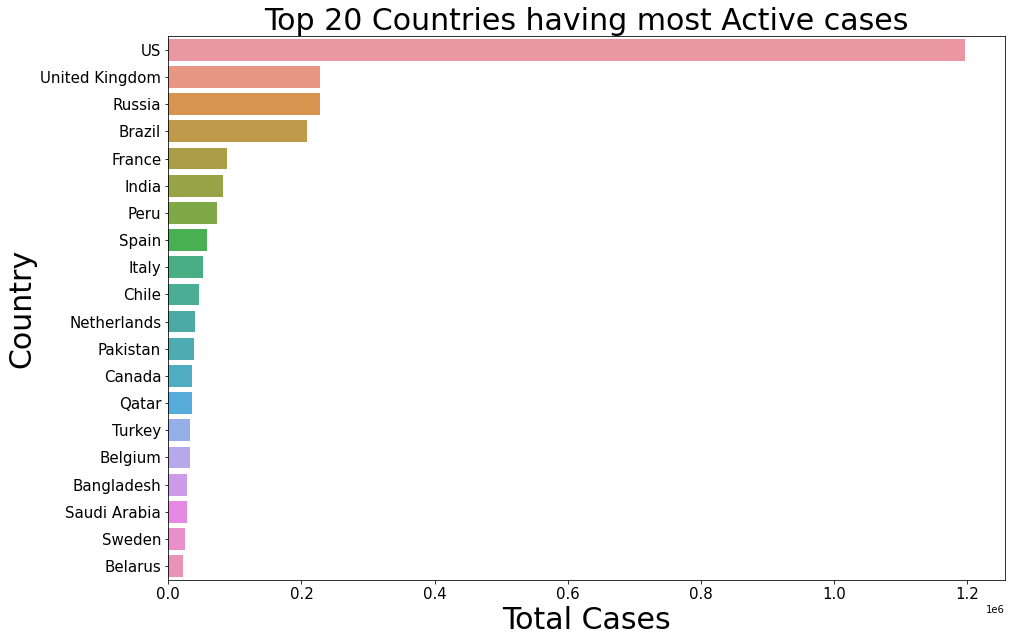

In [29]:
top_actives= top.groupby(by='Country')['Active'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Active cases",fontsize=30)
ax = sns.barplot(x=top_actives.Active,y=top_actives.Country)
ax.set(xlabel="Total Cases",ylabel="Country")

In [30]:
#DEATHS
top_death= top.groupby(by='Country')['Deaths'].sum()
top_death.head()

Country
Afghanistan    220
Albania         33
Algeria        617
Andorra         51
Angola           4
Name: Deaths, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

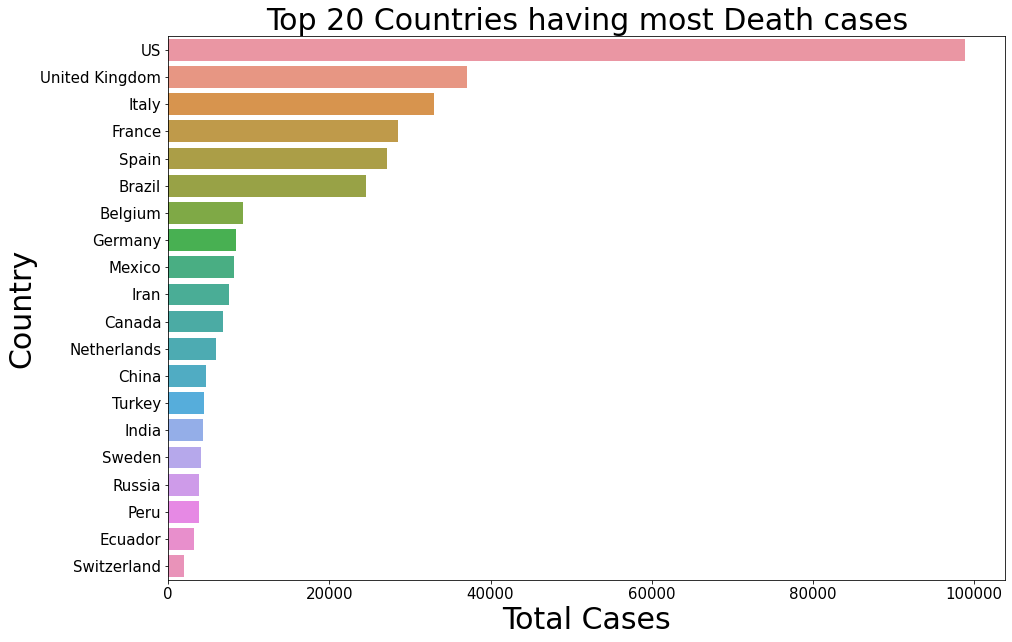

In [31]:
top_death= top.groupby(by='Country')['Deaths'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Death cases",fontsize=30)
ax = sns.barplot(x=top_death.Deaths,y=top_death.Country)
ax.set(xlabel="Total Cases",ylabel="Country")

In [32]:
#RECOVERED
top_recover= top.groupby(by='Country')['Recovered'].sum()
top_recover.head()

Country
Afghanistan    1128
Albania         803
Algeria        4918
Andorra         676
Angola           18
Name: Recovered, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

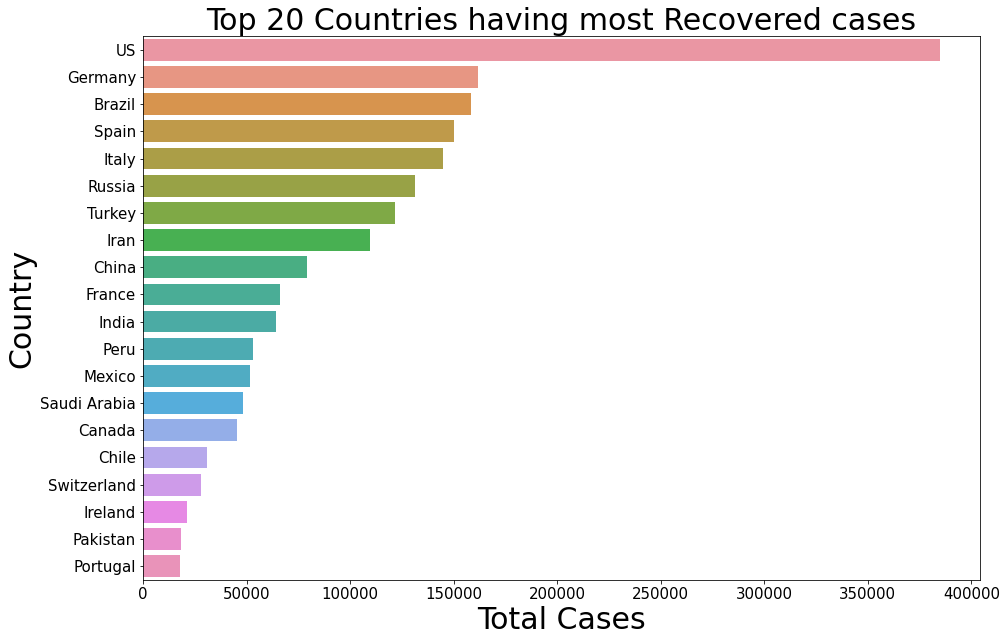

In [33]:
top_recover= top.groupby(by='Country')['Recovered'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Recovered cases",fontsize=30)
ax = sns.barplot(x=top_recover.Recovered,y=top_recover.Country)
ax.set(xlabel="Total Cases",ylabel="Country")

In [34]:
# Analysis on 4 countries

china = df[df.Country == 'China']
china = china.groupby(by='Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()


us = df[df.Country == 'US']
us = us.groupby(by='Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()


italy = df[df.Country == 'Italy']
italy = italy.groupby(by='Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()


india = df[df.Country == 'India']
india = india.groupby(by='Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()


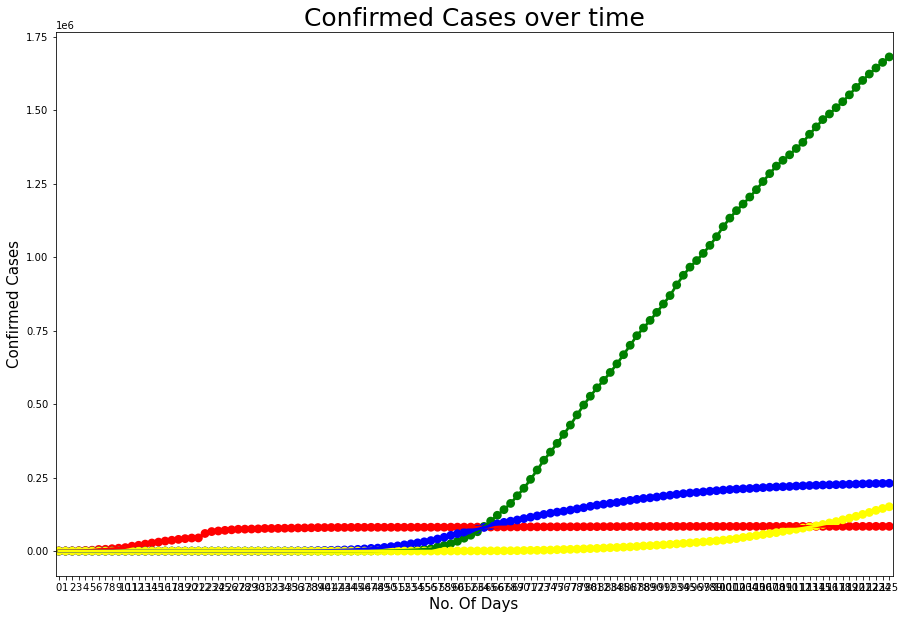

In [35]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Confirmed,color="Red")
sns.pointplot(us.index,us.Confirmed,color="Green")
sns.pointplot(italy.index,italy.Confirmed,color="Blue")
sns.pointplot(india.index,india.Confirmed,color="Yellow")
plt.title("Confirmed Cases over time", fontsize=25)
plt.ylabel("Confirmed Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

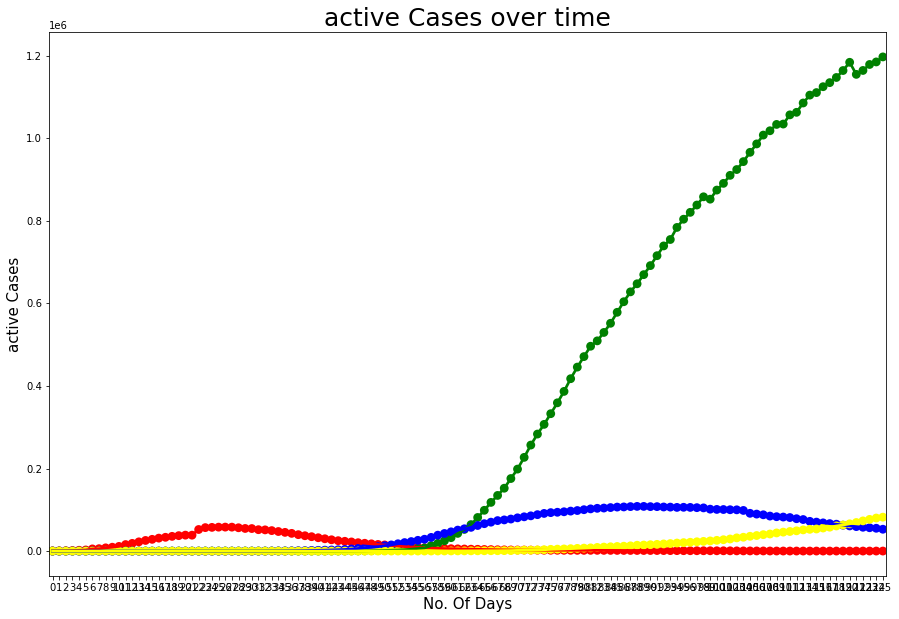

In [36]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Active,color="Red")
sns.pointplot(us.index,us.Active,color="Green")
sns.pointplot(italy.index,italy.Active,color="Blue")
sns.pointplot(india.index,india.Active,color="Yellow")
plt.title("active Cases over time", fontsize=25)
plt.ylabel("active Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

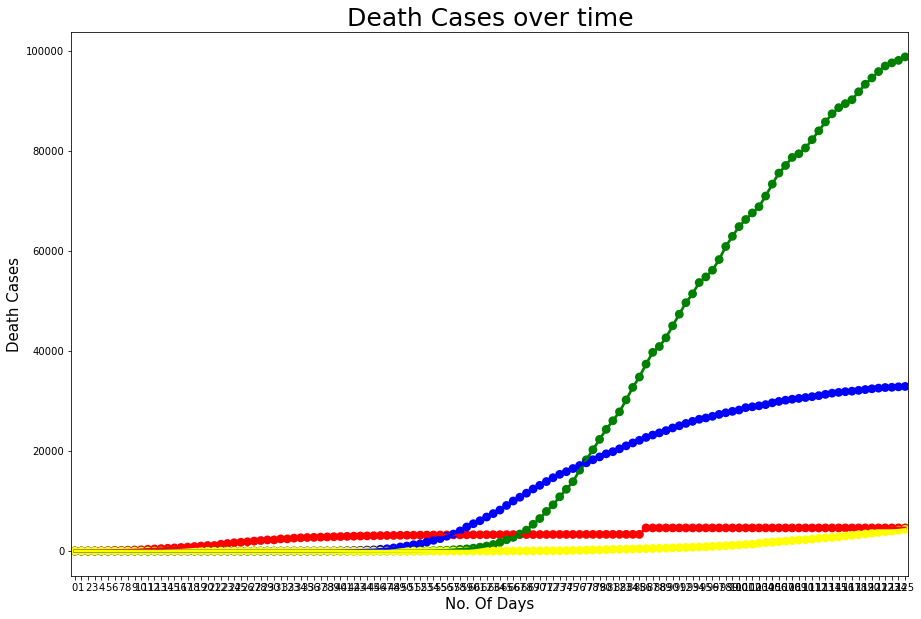

In [37]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Deaths,color="Red")
sns.pointplot(us.index,us.Deaths,color="Green")
sns.pointplot(italy.index,italy.Deaths,color="Blue")
sns.pointplot(india.index,india.Deaths,color="Yellow")
plt.title("Death Cases over time", fontsize=25)
plt.ylabel("Death Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

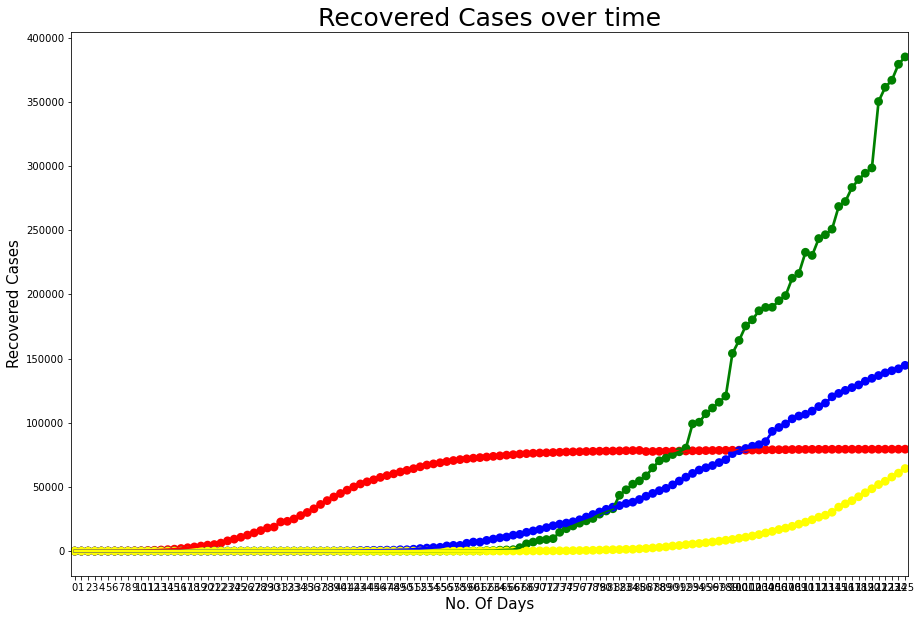

In [38]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Recovered,color="Red")
sns.pointplot(us.index,us.Recovered,color="Green")
sns.pointplot(italy.index,italy.Recovered,color="Blue")
sns.pointplot(india.index,india.Recovered,color="Yellow")
plt.title("Recovered Cases over time", fontsize=25)
plt.ylabel("Recovered Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

In [39]:
# predicting for confirmed first


df['month']=pd.DatetimeIndex(df['Date']).month
confirmed = df.groupby('month').sum()['Confirmed'].reset_index()
confirmed

,month,Confirmed
0,1,38534
1,2,1671783
2,3,8899917
3,4,63046693
4,5,115121451


In [40]:
#splitting the data for training and test

x=confirmed[['month']]
y=confirmed[['Confirmed']]

In [41]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    if r2_scr>max_score:
        max_score=r2_scr
        final_r_state=r_state
print("Maximimum r2 Score is",max_score,'at',final_r_state)

Maximimum r2 Score is 0.9101994113561934 at 46


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=46)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("R2 Score is: ",r2_score(y_test,pred))
print("RSME is: ",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score is:  0.9101994113561934
RSME is:  9196031.799240375


In [43]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(x, y)

print(skf)


StratifiedKFold(n_splits=2, random_state=None, shuffle=False)


In [44]:
#saving the above model

import joblib

joblib.dump(lr,'lrconfirmed.obj')                     # save the model in ojet file


['lrconfirmed.obj']